In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from prettytable import PrettyTable

In [ ]:
#Reading the Attack-Types file
attackTypesFiles = pd.read_csv("/content/sample_data/MLProject/training_attack_types")
print(attackTypesFiles)

               back dos
0   buffer_overflow u2r
1         ftp_write r2l
2      guess_passwd r2l
3              imap r2l
4         ipsweep probe
5              land dos
6        loadmodule u2r
7          multihop r2l
8           neptune dos
9            nmap probe
10             perl u2r
11              phf r2l
12              pod dos
13      portsweep probe
14          rootkit u2r
15          satan probe
16            smurf dos
17              spy r2l
18         teardrop dos
19      warezclient r2l
20      warezmaster r2l


In [ ]:
#Appending columns to the dataset and add ‘target’ column.
columnName ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns =[]
for c in columnName.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [ ]:
# Creating dictionary of Attack_types
attacks = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [ ]:
#Reading the training file
data = pd.read_csv("/content/sample_data/MLProject/kddcup.data_10_percent",names = columns)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
#null_values_in_column
target_Null_values = data['target'].isnull().sum()
print(target_Null_values)

0


In [ ]:
# Add Attack Type column to our DataFrame
data['Attack_Type'] = data.target.apply(lambda t:attacks[t[:-1]] if isinstance(t, str) else np.nan)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
#Checking for missing entries
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

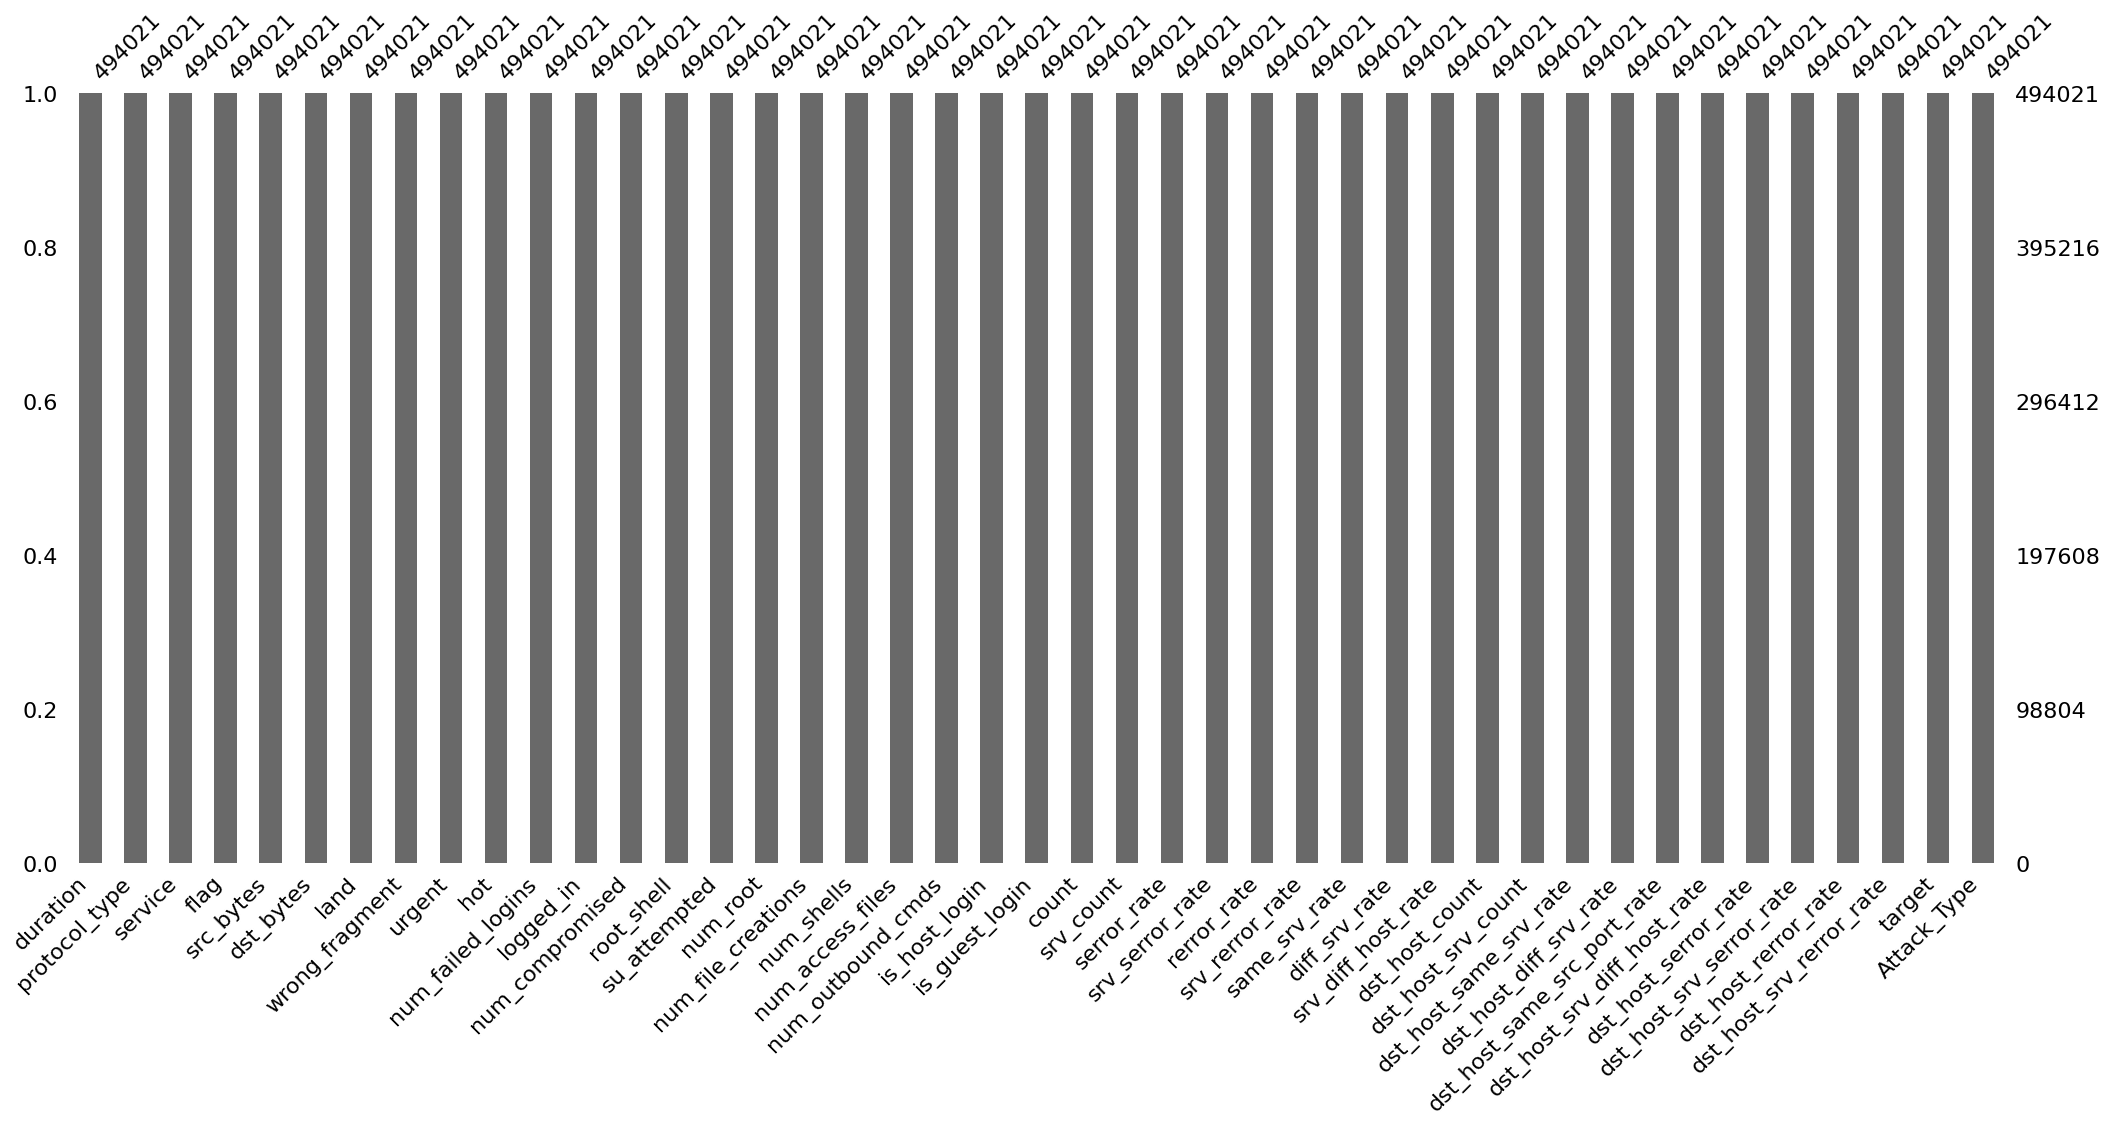

In [ ]:
#Visualizing missing entries(none found)
import missingno as msno
msno.bar(data)
plt.show()

In [ ]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack_Type'],
      dtype='object')

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Finding categorical features
numerical_cols = data._get_numeric_data().columns
categorical_cols = list(set(data.columns)-set(numerical_cols))
categorical_cols.remove('target')
categorical_cols.remove('Attack_Type')
categorical_cols

['service', 'flag', 'protocol_type']

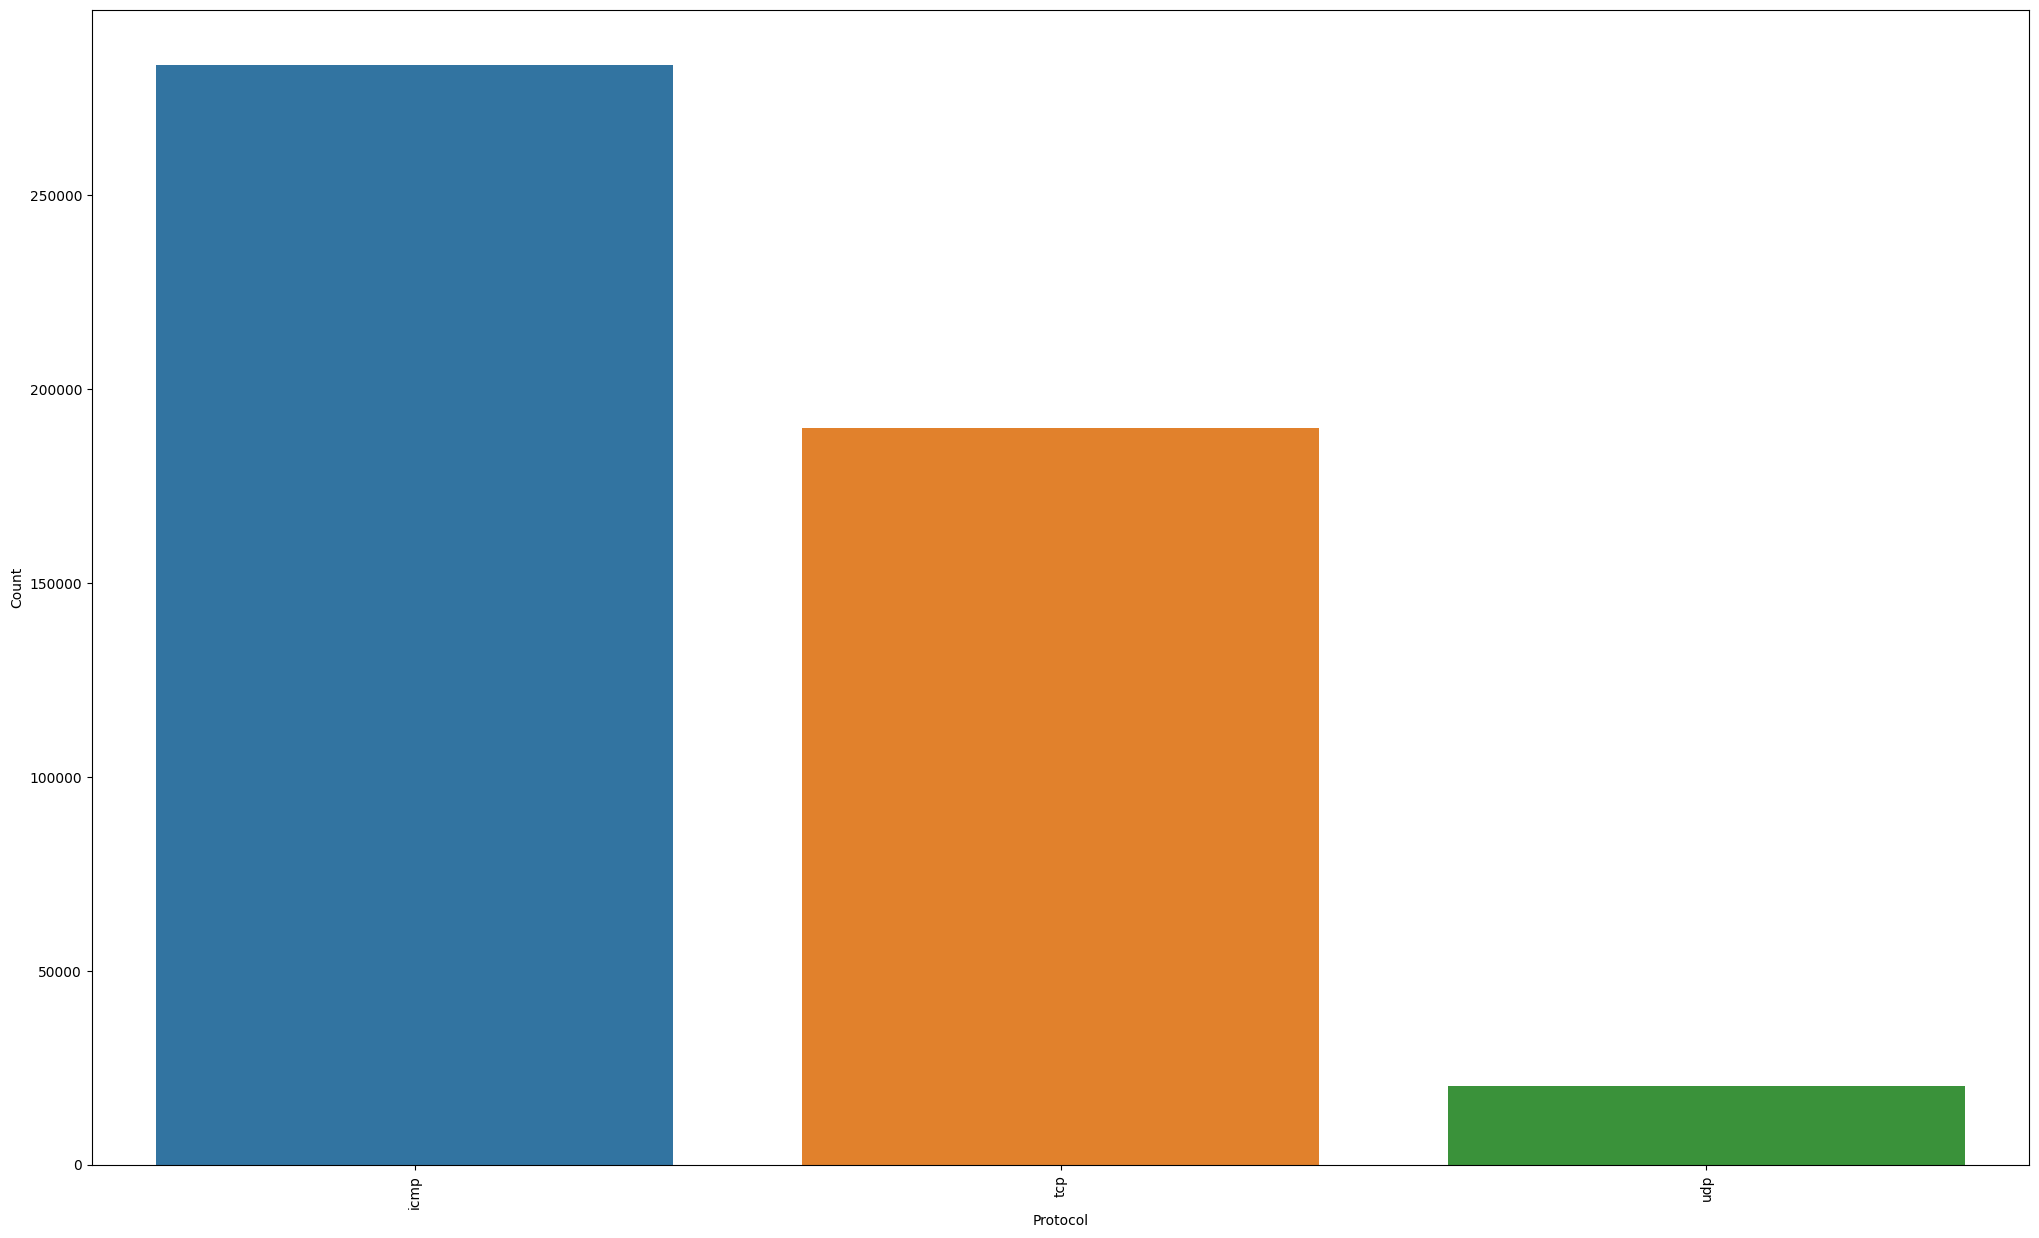

In [ ]:
df2 = pd.DataFrame(columns = ['Protocol'])
df2['Protocol']=[each for each in data.protocol_type.unique()]
df2['Count']=[len(data[data.protocol_type==each]) for each in df2.Protocol]
df2=df2.sort_values(by=['Count'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df2.Protocol.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

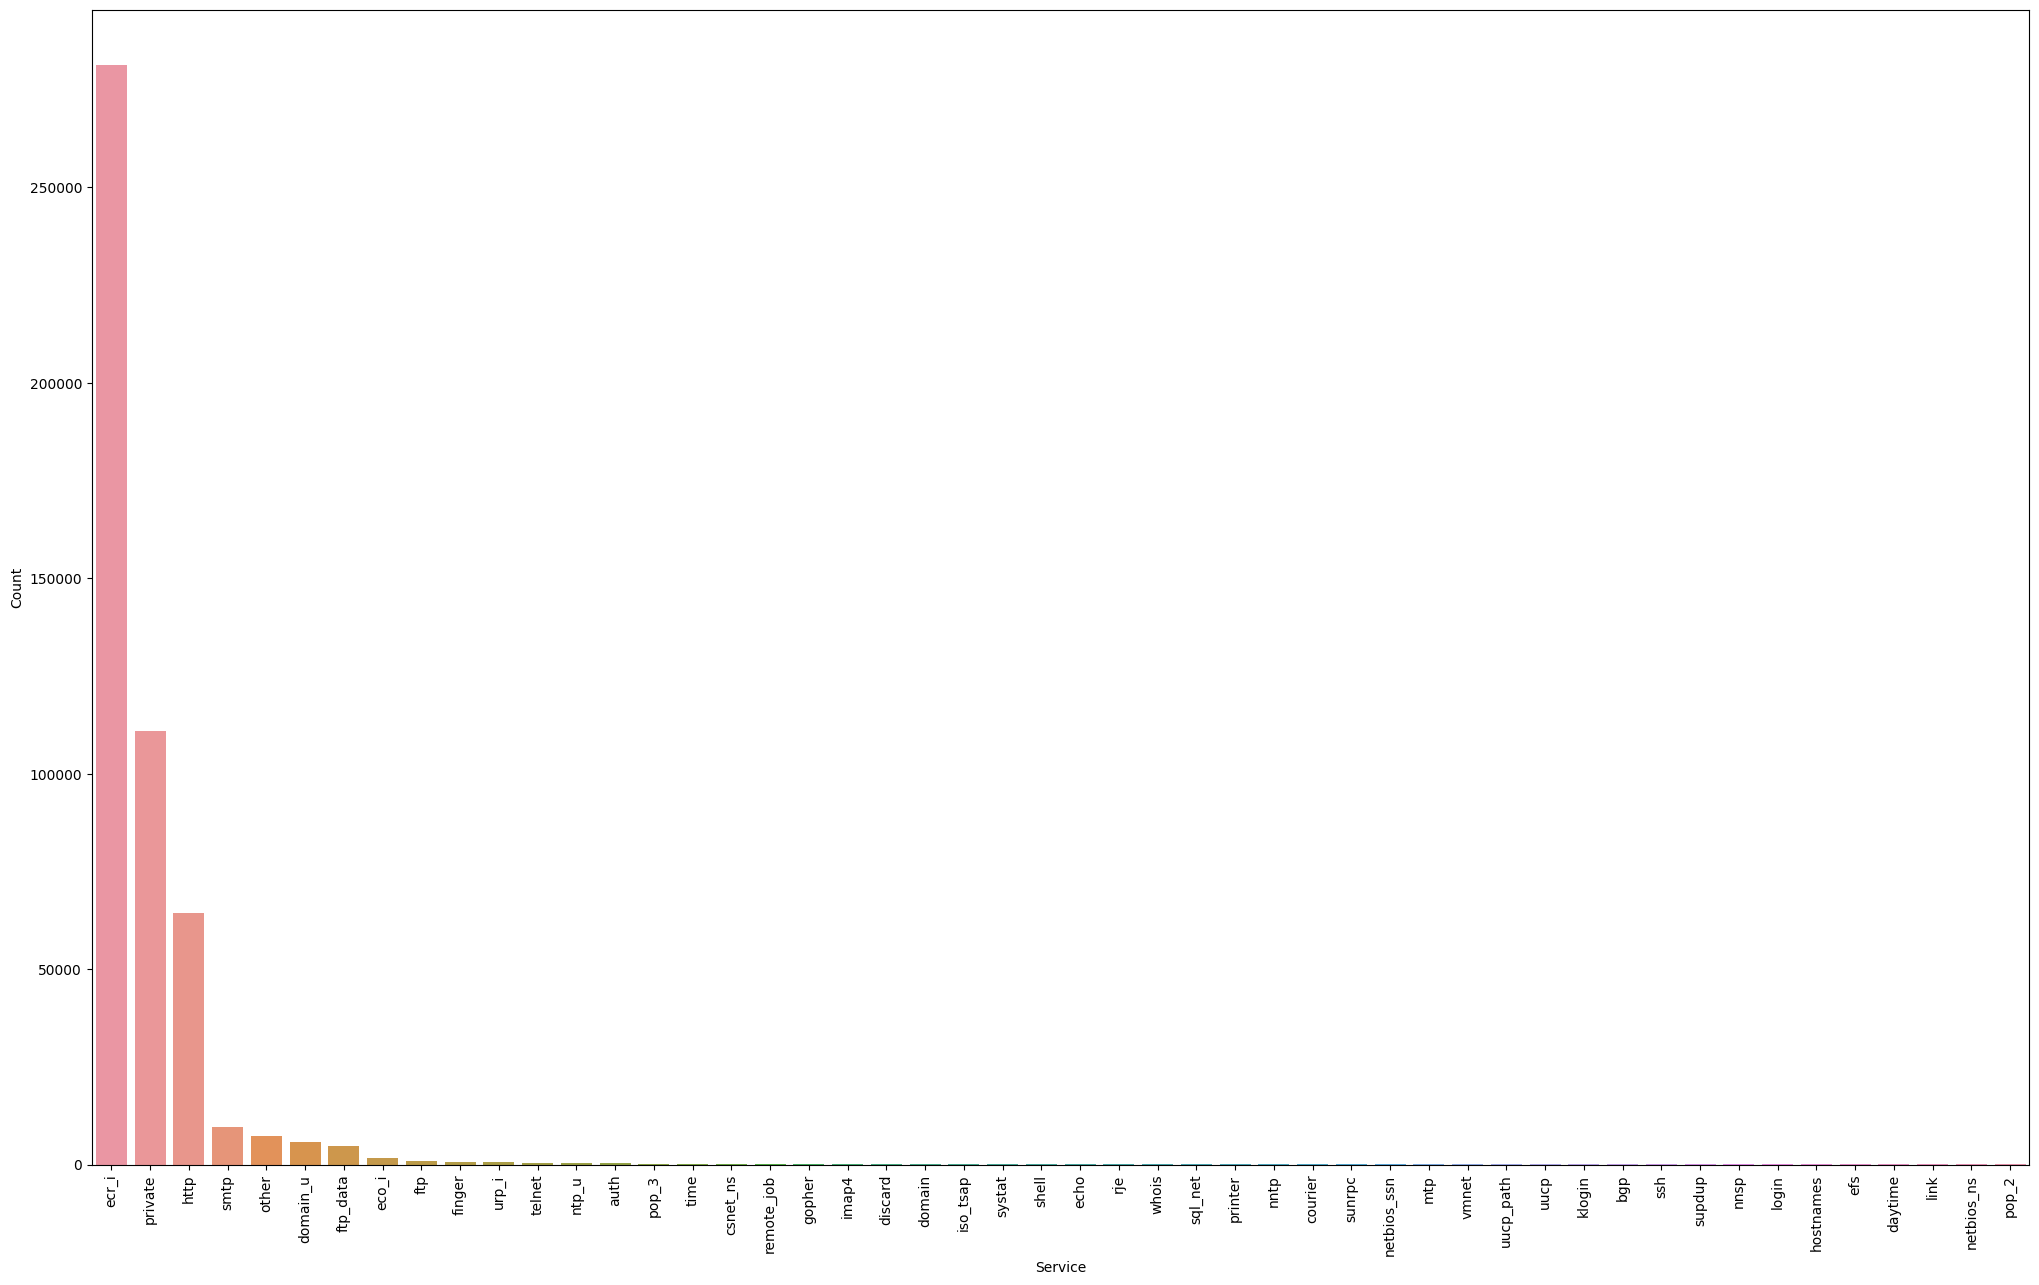

In [ ]:
df3 = pd.DataFrame(columns = ['Service'])
df3['Service']=[each for each in data.service.unique()]
df3['Count']=[len(data[data.service==each]) for each in df3.Service]
df3=df3.sort_values(by=['Count'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df3.Service.head(50), y=df3.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

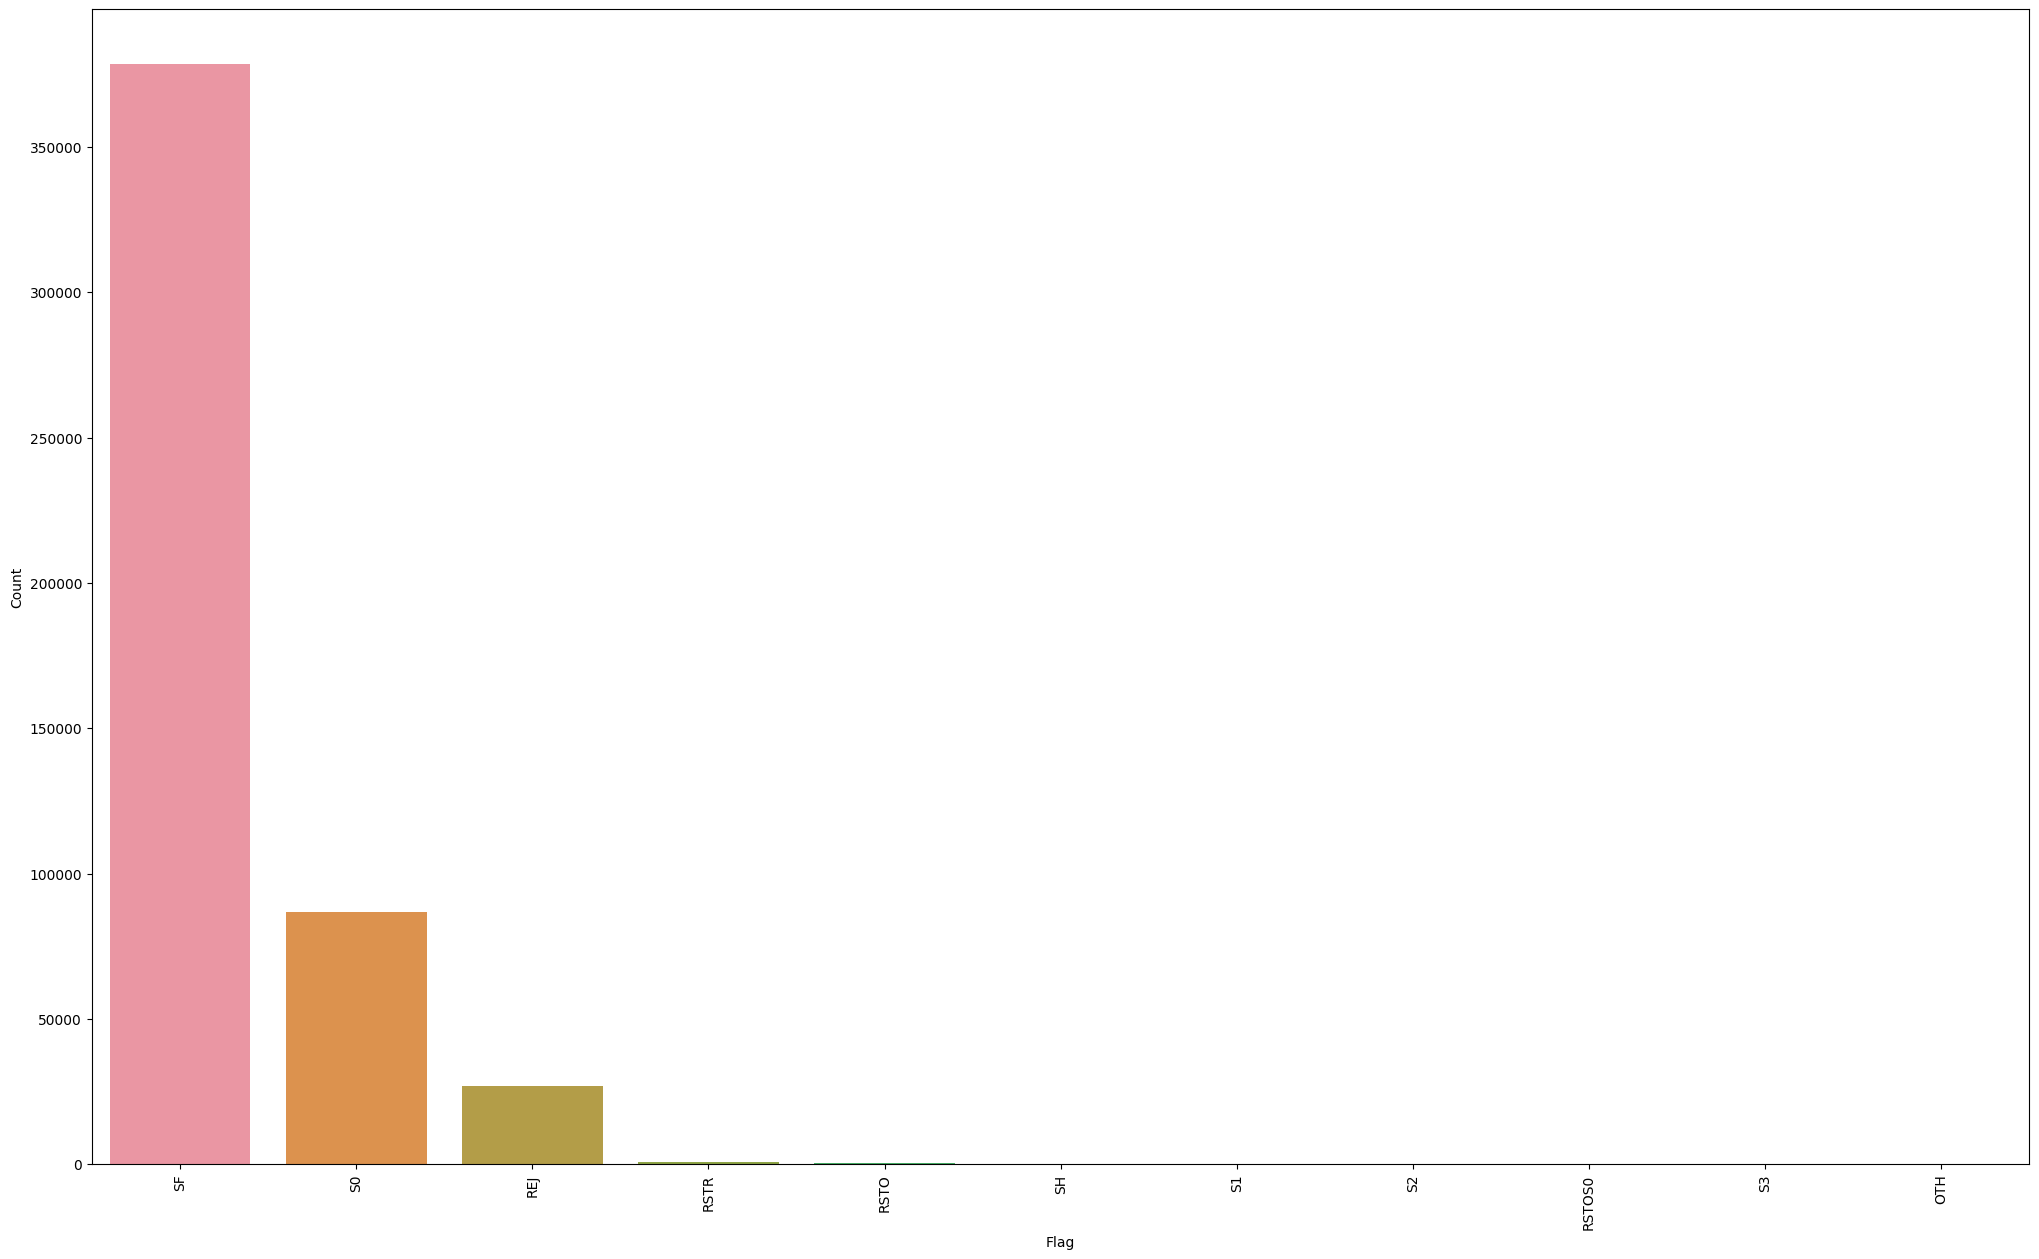

In [ ]:
df4 = pd.DataFrame(columns = ['Flag'])
df4['Flag']=[each for each in data.flag.unique()]
df4['Count']=[len(data[data.flag==each]) for each in df4.Flag]
df4=df4.sort_values(by=['Count'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df4.Flag.head(50), y=df4.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

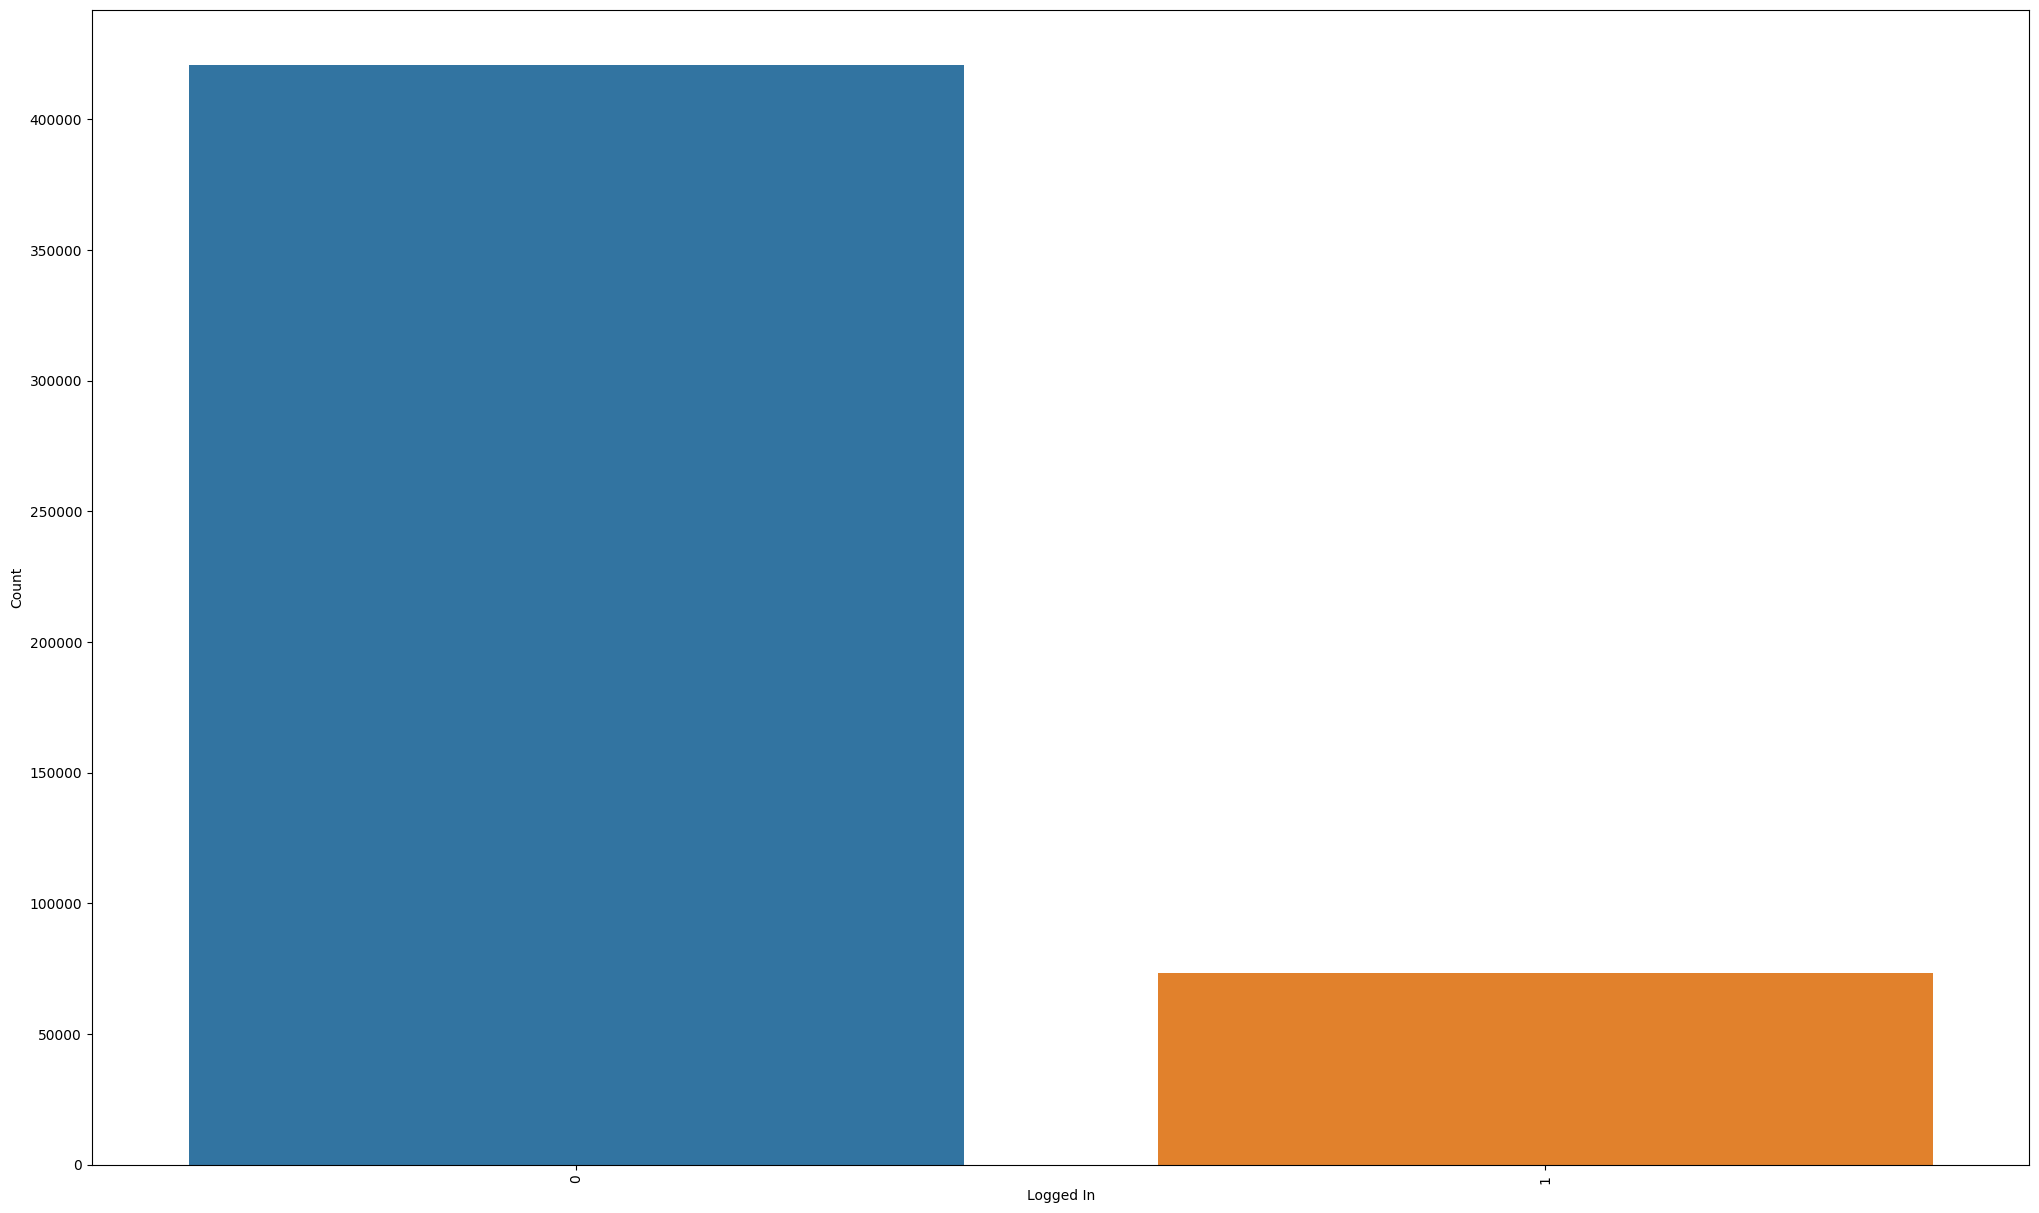

In [ ]:
df5 = pd.DataFrame(columns = ['Logged_In'])
df5['Logged_In']=[each for each in data.logged_in.unique()]
df5['Count']=[len(data[data.logged_in==each]) for each in df5.Logged_In]
df5=df5.sort_values(by=['Count'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df5.Logged_In.head(50), y=df5.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.show()

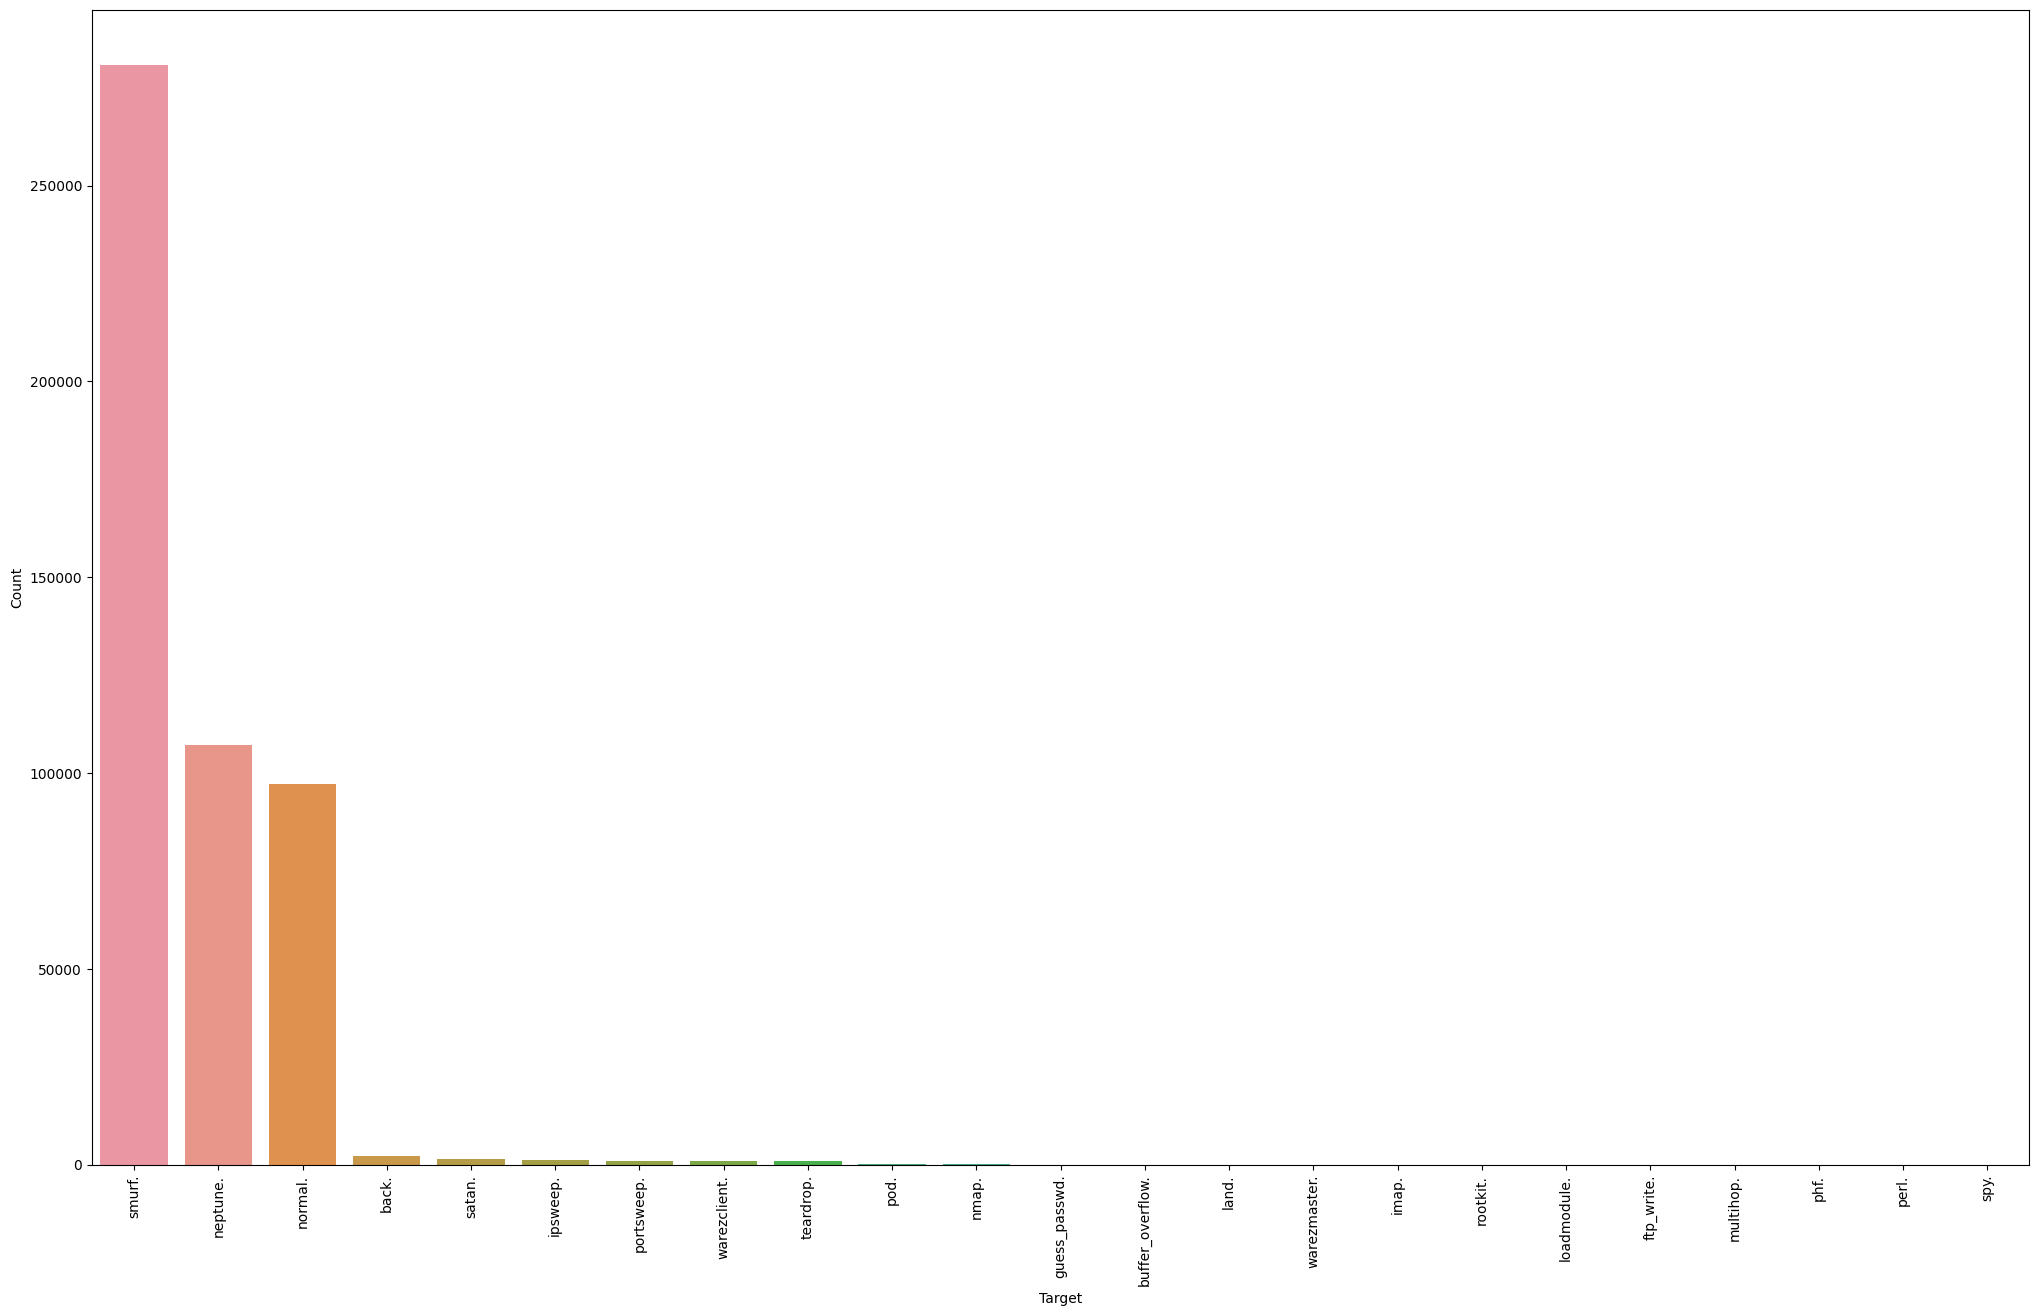

In [ ]:
df6 = pd.DataFrame(columns = ['Target'])
df6['Target']=[each for each in data.target.unique()]
df6['Count']=[len(data[data.target==each]) for each in df6.Target]
df6=df6.sort_values(by=['Count'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df6.Target.head(50), y=df6.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

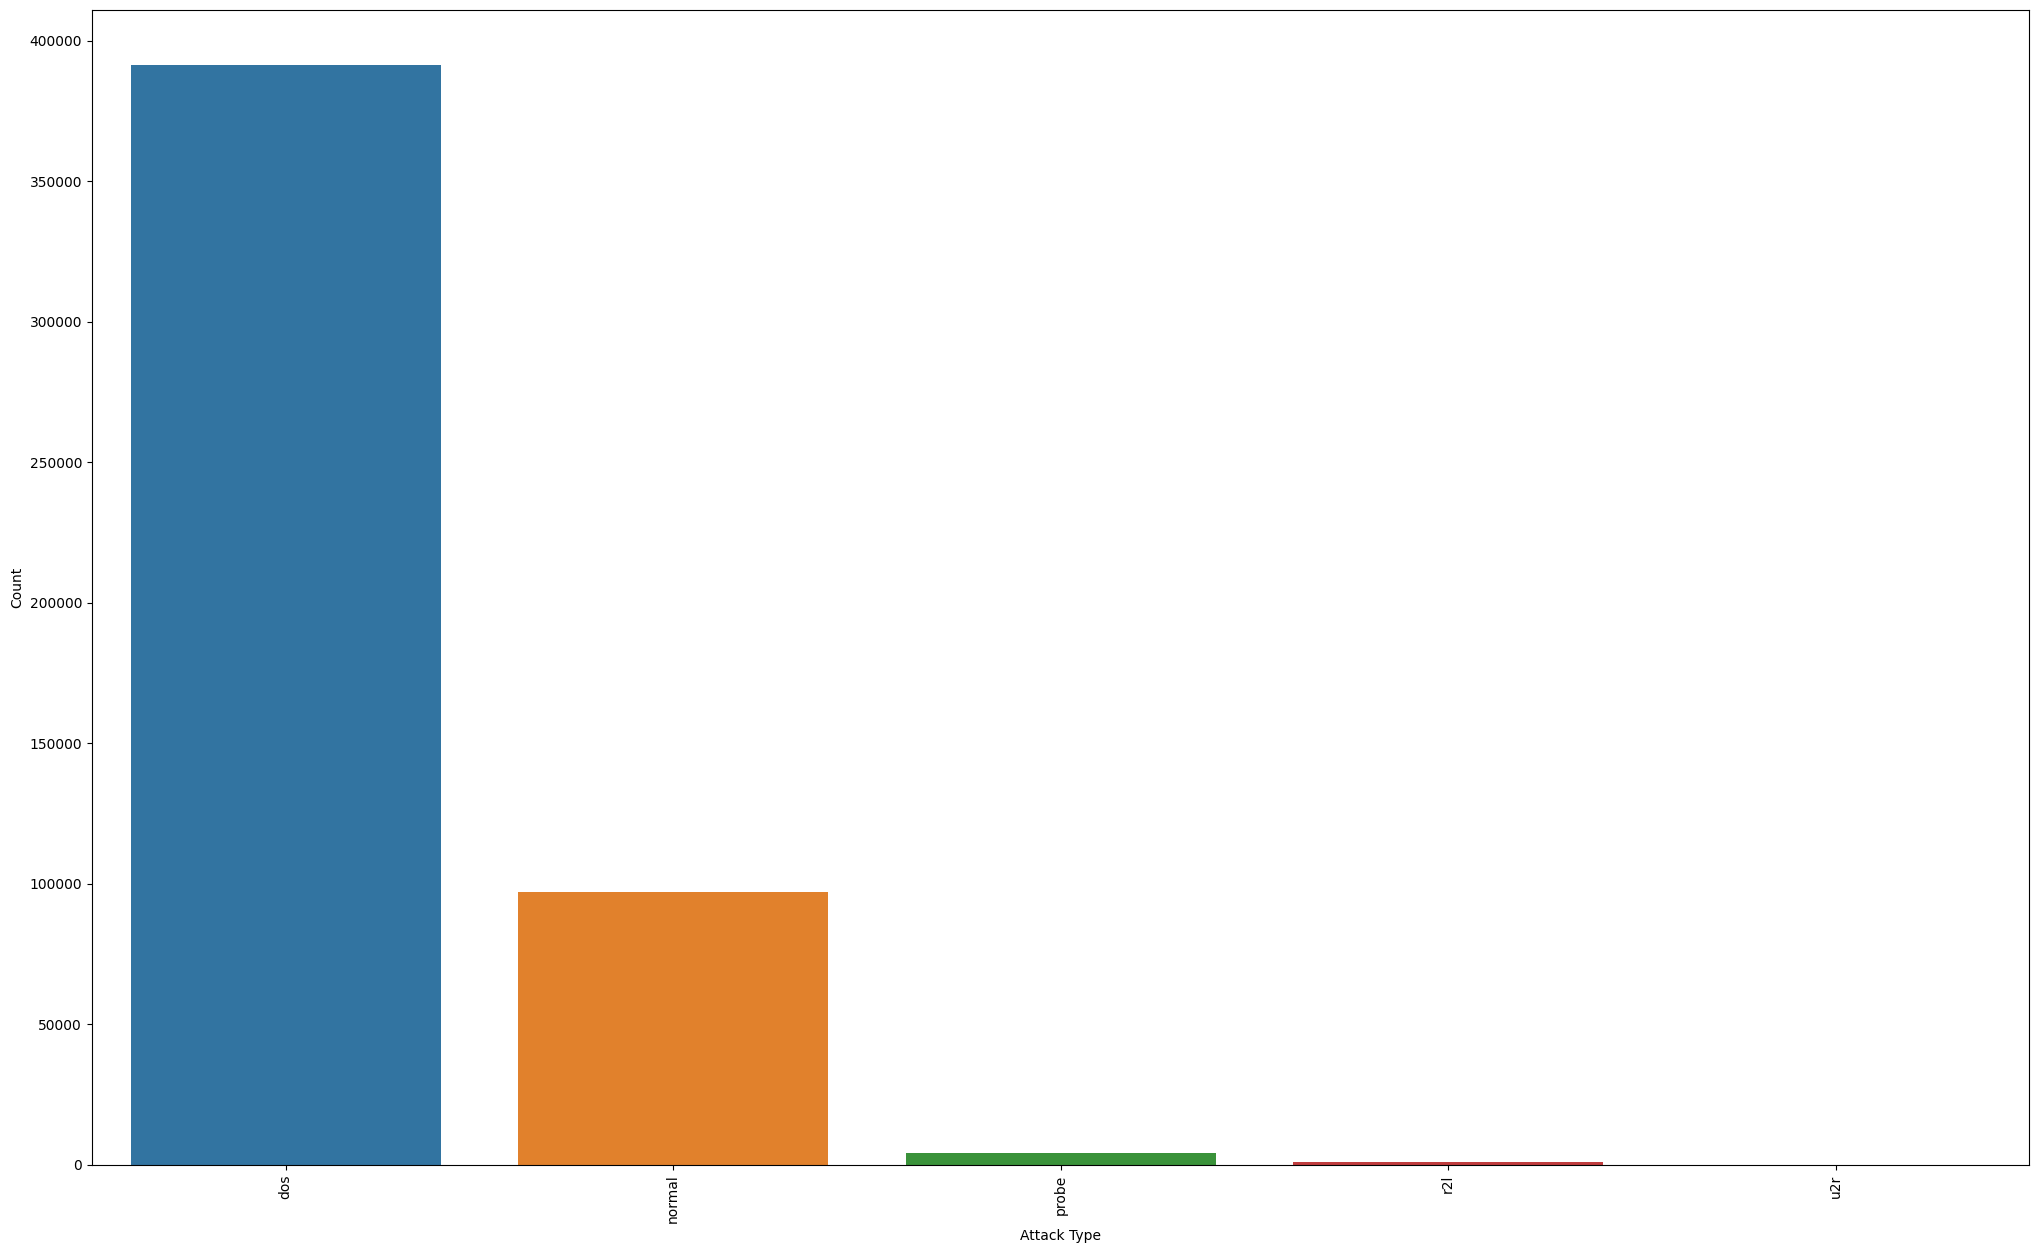

In [ ]:
df7 = pd.DataFrame(columns = ['Attack_Type'])
df7['Attack_Type']=[each for each in data.Attack_Type.unique()]
df7['Count']=[len(data[data.Attack_Type==each]) for each in df7.Attack_Type]
df7=df7.sort_values(by=['Count'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df7.Attack_Type.head(50), y=df7.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

In [ ]:
data['num_root'].corr(data['num_compromised'])

0.9938277978738052

In [ ]:
data['srv_serror_rate'].corr(data['serror_rate'])

0.9983615072725034

In [ ]:
data['srv_count'].corr(data['count'])

0.9436670688882661

In [ ]:
data['srv_rerror_rate'].corr(data['rerror_rate'])

0.9947309539817927

In [ ]:
data['dst_host_same_srv_rate'].corr(data['dst_host_srv_count'])

0.9736854572954139

In [ ]:
data['dst_host_srv_serror_rate'].corr(data['dst_host_serror_rate'])

0.9981559173373156

In [ ]:
data['dst_host_srv_rerror_rate'].corr(data['dst_host_rerror_rate'])

0.9848038371110178

In [ ]:
data['dst_host_same_srv_rate'].corr(data['same_srv_rate'])

0.9278080342691514

In [ ]:
data['dst_host_srv_count'].corr(data['same_srv_rate'])

0.8989546630323944

In [ ]:
data['dst_host_same_src_port_rate'].corr(data['srv_count'])

0.9449263676783438

In [ ]:
data['dst_host_serror_rate'].corr(data['serror_rate'])

0.9986729680104911

In [ ]:
data['dst_host_serror_rate'].corr(data['srv_serror_rate'])

0.9978353003739505

In [ ]:
data['dst_host_srv_serror_rate'].corr(data['serror_rate'])

0.997849248568041

In [ ]:
data['dst_host_srv_serror_rate'].corr(data['srv_serror_rate'])

0.9993041091849794

In [ ]:
data['dst_host_rerror_rate'].corr(data['rerror_rate'])

0.9869947924956146

In [ ]:
data['dst_host_rerror_rate'].corr(data['srv_rerror_rate'])

0.9821663427308605

In [ ]:
data['dst_host_srv_rerror_rate'].corr(data['rerror_rate'])

0.9851995540751525

In [ ]:
data['dst_host_srv_rerror_rate'].corr(data['srv_rerror_rate'])

0.9865705438845886

In [ ]:
#Drop highly correlated variables as these should be ignored for learning
data.drop('num_root',axis = 1,inplace = True)
data.drop('srv_serror_rate',axis = 1,inplace = True)
data.drop('srv_rerror_rate',axis = 1, inplace=True)
data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
data.drop('dst_host_serror_rate',axis = 1, inplace=True)
data.drop('dst_host_rerror_rate',axis = 1, inplace=True)
data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
data.drop('dst_host_same_srv_rate',axis = 1, inplace=True)
# Drop 'service' also since provides no useful information for learning
data.drop('service',axis = 1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   flag                         494021 non-null  object 
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [ ]:
data.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,tcp,SF,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
# Feature Mapping
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
data['protocol_type'] = data['protocol_type'].map(pmap)

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
data['flag'] = data['flag'].map(fmap)
data.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  int64  
 2   flag                         494021 non-null  int64  
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [ ]:
#Importing sklearn modelling tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
#Splitting the dataset
data = data.drop(['target', ], axis = 1)
print(data.shape)

#Split between target variable and train set
y = data[['Attack_Type']]
X = data.drop(['Attack_Type', ], axis = 1)
min_max_sc = MinMaxScaler() # Transform features by scaling each feature (ranfge = (0,1))
X = min_max_sc.fit_transform(X)

#Splitting dataset between training and testing set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 18)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 33)
(395216, 32) (98805, 32)
(395216, 1) (98805, 1)


In [ ]:
# Gaussian Naive Bayes Model
# GaussianNB implements the Gaussian Naive Bayes algorithm for classification.
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#ANN
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=18)

In [ ]:
#pip install prettytable

In [ ]:
# Lists to store classifier names and metrics
classifiers = ["Gaussian Naive Bayes", "Decision Tree", "Random Forest", "Support Vector Classifier",
               "Logistic Regression", "K-Nearest Neighbors", "Artificial Neural Network"]
train_accuracies, test_accuracies, train_times, test_times = [], [], [], []

#Creating PrettyTable for Training and Testing Accuracy
accuracy_table = PrettyTable()
accuracy_table.field_names = ["Classifier", "Training Accuracy", "Testing Accuracy"]

#Creating PrettyTable for Training and Testing Time
time_table = PrettyTable()
time_table.field_names = ["Classifier", "Training Time (seconds)", "Testing Time (seconds)"]

#Function to evaluate a classifier and store metrics
def evaluate_and_store_metrics(clf, X_train, y_train, X_test, y_test, name):
    #Training
    start_time = time.time()
    clf.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    train_time = end_time - start_time

    #Testing
    start_time = time.time()
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    end_time = time.time()
    test_time = end_time - start_time

    #Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    #Add rows to tables
    accuracy_table.add_row([name, f"{train_accuracy:.4f}", f"{test_accuracy:.4f}"])
    time_table.add_row([name, f"{train_time:.4f}", f"{test_time:.4f}"])

    #Store metrics in lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_times.append(train_time)
    test_times.append(test_time)

    #Print results
    print(f"\n{name} Classifier:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Testing Time: {test_time:.4f} seconds")

#Evaluate and store metrics for each classifier
evaluate_and_store_metrics(GaussianNB(), X_train, y_train, X_test, y_test, "Gaussian Naive Bayes")
evaluate_and_store_metrics(DecisionTreeClassifier(criterion="entropy", max_depth=4), X_train, y_train, X_test, y_test, "Decision Tree")
evaluate_and_store_metrics(RandomForestClassifier(n_estimators=30), X_train, y_train, X_test, y_test, "Random Forest")
evaluate_and_store_metrics(SVC(kernel='linear',gamma='scale'), X_train, y_train, X_test, y_test, "Support Vector Classifier")
evaluate_and_store_metrics(LogisticRegression(max_iter=1200000), X_train, y_train, X_test, y_test, "Logistic Regression")
evaluate_and_store_metrics(knn, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")
evaluate_and_store_metrics(ann, X_train, y_train, X_test, y_test, "Artificial Neural Network")



Gaussian Naive Bayes Classifier:
Training Accuracy: 0.8869
Testing Accuracy: 0.8861
Training Time: 0.7591 seconds
Testing Time: 0.6273 seconds

Decision Tree Classifier:
Training Accuracy: 0.9905
Testing Accuracy: 0.9909
Training Time: 1.3532 seconds
Testing Time: 0.0724 seconds

Random Forest Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.9997
Training Time: 7.8143 seconds
Testing Time: 1.1876 seconds

Support Vector Classifier Classifier:
Training Accuracy: 0.9977
Testing Accuracy: 0.9974
Training Time: 189.2696 seconds
Testing Time: 77.9514 seconds

Logistic Regression Classifier:
Training Accuracy: 0.9947
Testing Accuracy: 0.9945
Training Time: 48.4377 seconds
Testing Time: 0.1759 seconds

K-Nearest Neighbors Classifier:
Training Accuracy: 0.9993
Testing Accuracy: 0.9992
Training Time: 1.0389 seconds
Testing Time: 1145.4370 seconds

Artificial Neural Network Classifier:
Training Accuracy: 0.9993
Testing Accuracy: 0.9993
Training Time: 71.3181 seconds
Testing Time: 1.490

In [ ]:
#Printing the PrettyTables
print("\nTraining and Testing Accuracy:")
print(accuracy_table)
print("\nTraining and Testing Time:")
print(time_table)


Training and Testing Accuracy:
+---------------------------+-------------------+------------------+
|         Classifier        | Training Accuracy | Testing Accuracy |
+---------------------------+-------------------+------------------+
|    Gaussian Naive Bayes   |       0.8869      |      0.8861      |
|       Decision Tree       |       0.9905      |      0.9909      |
|       Random Forest       |       1.0000      |      0.9997      |
| Support Vector Classifier |       0.9977      |      0.9974      |
|    Logistic Regression    |       0.9947      |      0.9945      |
|    K-Nearest Neighbors    |       0.9993      |      0.9992      |
| Artificial Neural Network |       0.9993      |      0.9993      |
+---------------------------+-------------------+------------------+

Training and Testing Time:
+---------------------------+-------------------------+------------------------+
|         Classifier        | Training Time (seconds) | Testing Time (seconds) |
+------------------

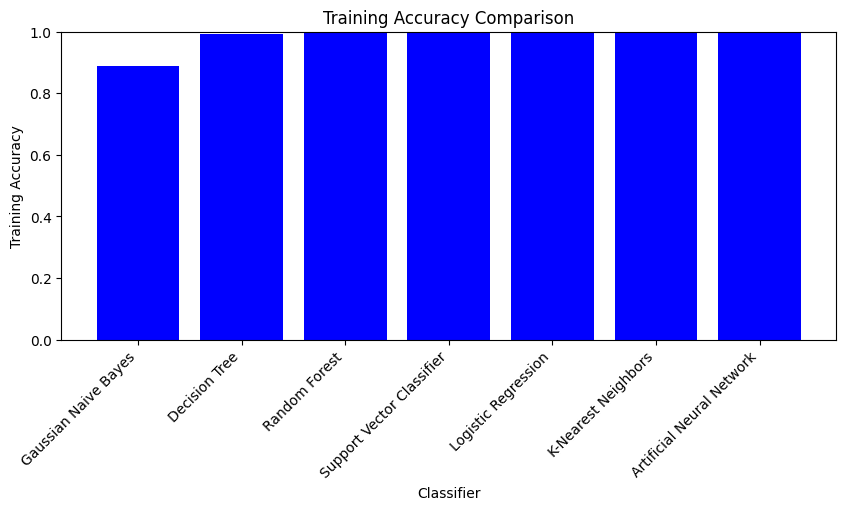

In [ ]:
#Bar plot for training accuracies
plt.figure(figsize=(10, 4))
plt.bar(classifiers, train_accuracies, color='blue')
plt.title("Training Accuracy Comparison")
plt.xlabel("Classifier")
plt.ylabel("Training Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to the range of accuracy (0 to 1)
plt.xticks(rotation=45, ha="right")
plt.show()

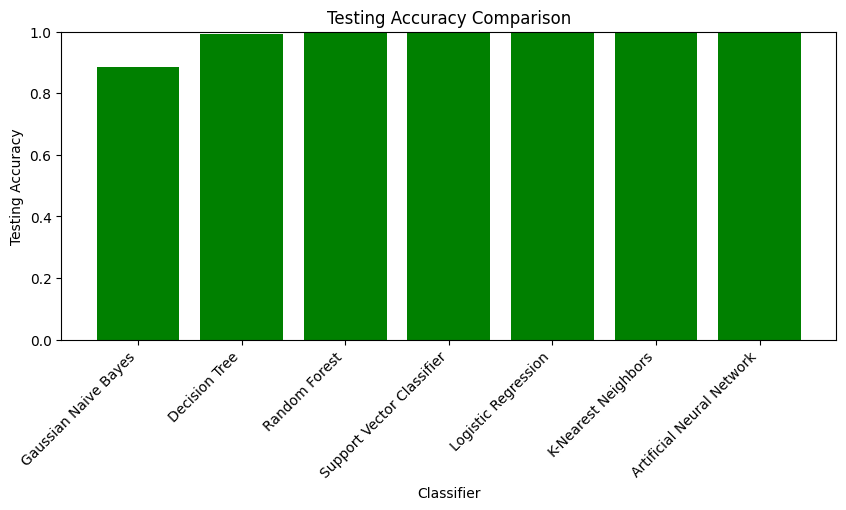

In [ ]:
#Bar plot for testing accuracies
plt.figure(figsize=(10, 4))
plt.bar(classifiers, test_accuracies, color='green')
plt.title("Testing Accuracy Comparison")
plt.xlabel("Classifier")
plt.ylabel("Testing Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to the range of accuracy (0 to 1)
plt.xticks(rotation=45, ha="right")
plt.show()

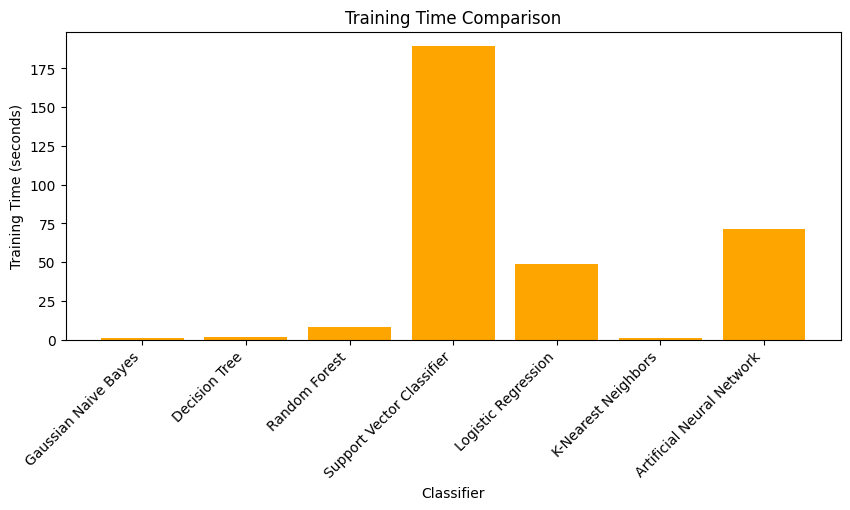

In [ ]:
#Bar plot for training times
plt.figure(figsize=(10, 4))
plt.bar(classifiers, train_times, color='orange')
plt.title("Training Time Comparison")
plt.xlabel("Classifier")
plt.ylabel("Training Time (seconds)")
plt.xticks(rotation=45, ha="right")
plt.show()

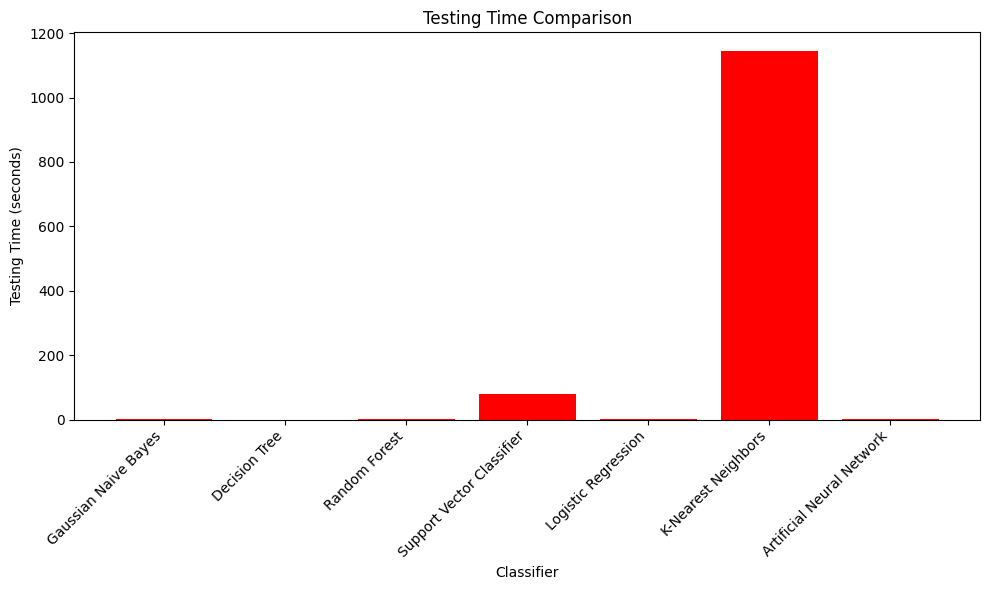

In [ ]:
#Bar plot for testing times
plt.figure(figsize=(10, 6))
plt.bar(classifiers, test_times, color='red')
plt.title("Testing Time Comparison")
plt.xlabel("Classifier")
plt.ylabel("Testing Time (seconds)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()